In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist

In [ ]:
#mnist dataset : https://keras.io/api/datasets/mnist/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
(x_train, y_train) ,(x_test, y_test) = mnist.load_data()

# try this data :| 
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train[0].shape


(28, 28)

In [15]:
y_train = y_train[..., np.newaxis]
y_test = y_test[..., np.newaxis]
y_train.shape

(60000, 1)

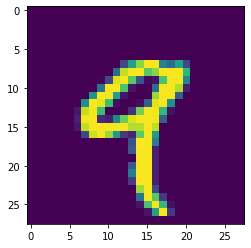

In [16]:
plt.imshow(x_train[4]) # 28 X 28 images

In [17]:
y_train[4]

array([9], dtype=uint8)

In [18]:
x_train = x_train/255.0
x_test = x_test/255.0

In [19]:
#x_train[0].  ## convolutional layers for computer vision

In [20]:
# [[1,2,3]
#  [4,5,6]]

#  [1,2,3,4,5,6]  

28*28

784

## Flatten: Used to convert N-D array to 1D -arrays




In [41]:
model = models.Sequential(
    [
    layers.Flatten(input_shape = (28,28)),
    layers.Dense(64, activation = 'relu', name = 'first_layer'),
    layers.Dropout(0.2),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation = 'softmax' )
    ]
)

# Dropout, optimizer, sparse_categorical_crossentropy

model.compile(
    optimizer = 'adam',    # rmsprop, sgd
    loss = 'sparse_categorical_crossentropy',  # binary_crossentropy, categorical_crossentropy
    metrics = ['accuracy', 'mse']
)

In [ ]:
# categorical_crossentropy: true labels: [0 0 1], [0 1 0], [0 0 1] ,:  predicted : [0 0 1], [1 0 0], [0 0 1]

# sparse_categorical_crossentropy: true label: 2, 1, 2 : predicted : [0 0 1], [1 0 0], [0 0 1]


#


# categorical_crossentropy:       0 :  [1 0 0 0 0 0 0 0 0 0 0]
# sparse_categorical_crossentropy 1 :  [0 1 0 0 0 0 0 0 0 0 0]

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
first_layer (Dense)          (None, 64)                50240     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
__________________________________________________

In [27]:
model.fit(
    x_train, y_train,
    epochs = 10,
    batch_size = 128
)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0953 - accuracy: 0.9704 - mse: 27.3896
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0934 - accuracy: 0.9711 - mse: 27.3896
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0892 - accuracy: 0.9714 - mse: 27.3899
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0890 - accuracy: 0.9715 - mse: 27.3899
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0864 - accuracy: 0.9727 - mse: 27.3901
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0813 - accuracy: 0.9744 - mse: 27.3903
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0796 - accuracy: 0.9743 - mse: 27.3903
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0771 - accuracy: 0.9753 - mse: 27.3905
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0753

In [28]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0840 - accuracy: 0.9753 - mse: 27.3380


[0.08403781801462173, 0.9753000140190125, 27.337987899780273]

In [31]:
model.fit(
    x_train, y_train,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.15
)

Epoch 1/10
399/399 [==============================] - 2s 5ms/step - loss: 0.5921 - accuracy: 0.8196 - mse: 27.3429 - val_loss: 0.1969 - val_accuracy: 0.9439 - val_mse: 27.4918
Epoch 2/10
399/399 [==============================] - 2s 4ms/step - loss: 0.2707 - accuracy: 0.9200 - mse: 27.3603 - val_loss: 0.1466 - val_accuracy: 0.9577 - val_mse: 27.4958
Epoch 3/10
399/399 [==============================] - 2s 4ms/step - loss: 0.2122 - accuracy: 0.9377 - mse: 27.3639 - val_loss: 0.1216 - val_accuracy: 0.9631 - val_mse: 27.4973
Epoch 4/10
399/399 [==============================] - 2s 4ms/step - loss: 0.1819 - accuracy: 0.9469 - mse: 27.3655 - val_loss: 0.1091 - val_accuracy: 0.9669 - val_mse: 27.4984
Epoch 5/10
399/399 [==============================] - 2s 4ms/step - loss: 0.1582 - accuracy: 0.9517 - mse: 27.3666 - val_loss: 0.1023 - val_accuracy: 0.9707 - val_mse: 27.4992
Epoch 6/10
399/399 [==============================] - 2s 4ms/step - loss: 0.1469 - accuracy: 0.9556 - mse: 27.3673 - val

In [33]:
history = model.fit(
    x_train, y_train,
    epochs = 20,
    batch_size = 128,
    validation_split = 0.15
)

# in Machine Learning: train - test
# in deep learning: train - validation - test

Epoch 1/20
399/399 [==============================] - 39s 5ms/step - loss: 0.5788 - accuracy: 0.8247 - mse: 27.3432 - val_loss: 0.1981 - val_accuracy: 0.9446 - val_mse: 27.4919
Epoch 2/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2726 - accuracy: 0.9201 - mse: 27.3603 - val_loss: 0.1483 - val_accuracy: 0.9558 - val_mse: 27.4954
Epoch 3/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2160 - accuracy: 0.9349 - mse: 27.3634 - val_loss: 0.1257 - val_accuracy: 0.9636 - val_mse: 27.4976
Epoch 4/20
399/399 [==============================] - 2s 4ms/step - loss: 0.1823 - accuracy: 0.9447 - mse: 27.3653 - val_loss: 0.1106 - val_accuracy: 0.9688 - val_mse: 27.4986
Epoch 5/20
399/399 [==============================] - 2s 4ms/step - loss: 0.1622 - accuracy: 0.9502 - mse: 27.3665 - val_loss: 0.1014 - val_accuracy: 0.9704 - val_mse: 27.4994
Epoch 6/20
399/399 [==============================] - 2s 4ms/step - loss: 0.1465 - accuracy: 0.9556 - mse: 27.3674 - va

In [34]:
df = pd.DataFrame(history.history)
df

,loss,accuracy,mse,val_loss,val_accuracy,val_mse
0,0.578777,0.824726,27.343216,0.198051,0.944556,27.491928
1,0.272591,0.920118,27.360336,0.148298,0.955778,27.495443
2,0.216033,0.934902,27.363432,0.125674,0.963556,27.497629
3,0.182346,0.944706,27.365307,0.110632,0.968778,27.498562
4,0.162195,0.950176,27.366541,0.101368,0.970444,27.499369
5,0.146505,0.955608,27.367371,0.100131,0.970667,27.499723
6,0.134763,0.958804,27.368029,0.095662,0.972444,27.499844
7,0.123693,0.961333,27.368513,0.093119,0.972556,27.500389
8,0.118283,0.962431,27.368843,0.086425,0.973333,27.500355
9,0.113528,0.963922,27.369198,0.088101,0.973778,27.500460


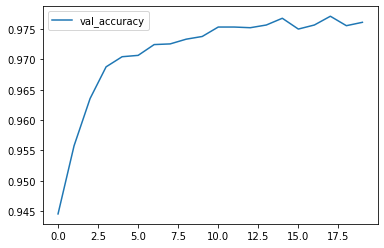

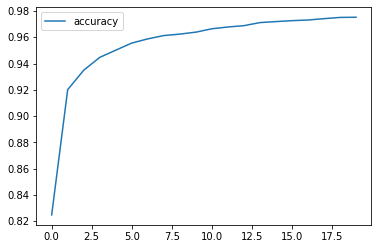

In [36]:
df.plot(y = 'val_accuracy')
df.plot(y = 'accuracy')

In [37]:
y = model.predict(x_test[0:1])

In [ ]:
y

array([[1.3147031e-08, 1.7291875e-07, 7.3216456e-06, 3.8334334e-04,
        2.7177655e-10, 6.3254276e-08, 2.0839318e-12, 9.9960154e-01,
        4.8004799e-06, 2.7260569e-06]], dtype=float32)

In [ ]:
y.shape

(1, 10)

In [38]:
tf.argmax(y, axis=-1)

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([7])>

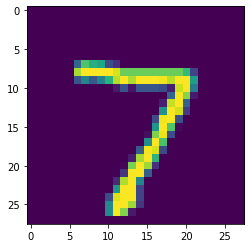

In [ ]:
plt.imshow(x_test[0])

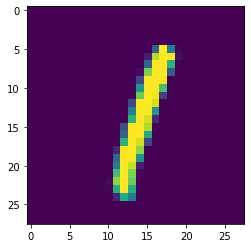

In [44]:
plt.imshow(x_test[5])

# CallBAcks

In [ ]:
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping

model.fit(
    x_train, y_train,
    epochs = 30,
    batch_size = 128,
    validation_split = .15,
    callbacks = [EarlyStopping(patience= 2)]
)

Epoch 1/30
399/399 [==============================] - 1s 3ms/step - loss: 0.6330 - accuracy: 0.8174 - val_loss: 0.1478 - val_accuracy: 0.9589
Epoch 2/30
399/399 [==============================] - 1s 2ms/step - loss: 0.1492 - accuracy: 0.9556 - val_loss: 0.1148 - val_accuracy: 0.9670
Epoch 3/30
399/399 [==============================] - 1s 3ms/step - loss: 0.0991 - accuracy: 0.9709 - val_loss: 0.0928 - val_accuracy: 0.9720
Epoch 4/30
399/399 [==============================] - 1s 3ms/step - loss: 0.0721 - accuracy: 0.9775 - val_loss: 0.0853 - val_accuracy: 0.9743
Epoch 5/30
399/399 [==============================] - 1s 3ms/step - loss: 0.0499 - accuracy: 0.9855 - val_loss: 0.0787 - val_accuracy: 0.9768
Epoch 6/30
399/399 [==============================] - 1s 3ms/step - loss: 0.0386 - accuracy: 0.9890 - val_loss: 0.0826 - val_accuracy: 0.9756
Epoch 7/30
399/399 [==============================] - 1s 3ms/step - loss: 0.0340 - accuracy: 0.9900 - val_loss: 0.0770 - val_accuracy: 0.9787
Epoch 

In [ ]:
#callbacks = [tf.keras.callbacks.EarlyStopping()]  patience 
# Arguments: 1) patience = 0 (def), 2) monitor = 'val_loss' (default) 3) min_delta = 0.01 (measure of improvement), 4) mode = 'auto'. 

In [42]:
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

path = 'hamdwriting/model_weights'
checkpoint = ModelCheckpoint(filepath = path,
                             frequency = 'epoch',
                             save_weights_only = True,
                             save_best_only = True,
                             verbose =1
                          )


model.fit(
    x_train, y_train,
    epochs = 25,
    batch_size = 128,
    validation_split = .15,
    callbacks = [EarlyStopping(patience= 2), checkpoint]


)

Epoch 1/25
399/399 [==============================] - 2s 5ms/step - loss: 0.5979 - accuracy: 0.8199 - mse: 27.3424 - val_loss: 0.2086 - val_accuracy: 0.9404 - val_mse: 27.4906

Epoch 00001: val_loss improved from inf to 0.20863, saving model to hamdwriting/model_weights
Epoch 2/25
399/399 [==============================] - 2s 4ms/step - loss: 0.2810 - accuracy: 0.9161 - mse: 27.3596 - val_loss: 0.1507 - val_accuracy: 0.9562 - val_mse: 27.4953

Epoch 00002: val_loss improved from 0.20863 to 0.15070, saving model to hamdwriting/model_weights
Epoch 3/25
399/399 [==============================] - 2s 4ms/step - loss: 0.2222 - accuracy: 0.9333 - mse: 27.3631 - val_loss: 0.1269 - val_accuracy: 0.9634 - val_mse: 27.4970

Epoch 00003: val_loss improved from 0.15070 to 0.12686, saving model to hamdwriting/model_weights
Epoch 4/25
399/399 [==============================] - 2s 4ms/step - loss: 0.1885 - accuracy: 0.9435 - mse: 27.3650 - val_loss: 0.1140 - val_accuracy: 0.9671 - val_mse: 27.4983

Ep

In [43]:
! ls hamdwriting

checkpoint  model_weights.data-00000-of-00001  model_weights.index


In [ ]:
model_weights.data-00000-of-00001

SyntaxError: ignored

In [ ]:
model.load_weights(path)

### Atready saved model in tensorflow: Transfer Learning

In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
model = InceptionV3()

96116736/96112376 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________